# Tarefa 2 - Flight Price Prediction

## Import Libraries

In [93]:
! pip install researchpy

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
import researchpy as rp
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Data Understanding

#### Import Dataset

Iniciamos o estudo do dataset pelo load dos dados numa dataframe panda.

In [95]:
dataf = pd.read_csv('./datasets/flight_price.csv')

Imprimimos as primeiras linhas do dataframe.

In [96]:
dataf.head()

,serial_number,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Imprimimos as últimas linhas do dataframe:

In [97]:
dataf.tail()

,serial_number,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


De forma a verificarmos quantas entradas e atributos o dataset possui:

In [98]:
dataf.shape

(300153, 12)

É possível verificar que temos 8763 entradas com 26 atributos cada

Em seguida, geramos as estatísticas descritivas:

In [99]:
dataf.describe()

,serial_number,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


De forma a obtermos um resumo da informação (número de valores não nulos em cada coluna, o tipo de dados de cada coluna e o uso de memória) contida no Dataframe:

In [100]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   serial_number     300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


#### Missing Values

Verificamos se existem missing values:

In [101]:
dataf.isna().any()

serial_number       False
airline             False
flight              False
source_city         False
departure_time      False
stops               False
arrival_time        False
destination_city    False
class               False
duration            False
days_left           False
price               False
dtype: bool

In [102]:
print(dataf.isna().sum())

serial_number       0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


#### Duplicated Values

De forma a verificar se o dataset tem linhas duplicadas:

In [103]:
dataf.duplicated().sum()

0

Como é possível verificar o dataset não apresenta missing values nem tem linhas duplicadas.

Através desta análise fomos capazes de verificar que o dataset que escolhemos possui:
- 8763 entradas
- 26 atributos
- Todos valores não nulos
- Não existem missing values

Podemos também verificar que no dataset temos presentes atributos:
- Categóricos (Patient ID, Sex, Diet, Country, Continent, Hemisphere)
    - Binários (Diabetes, Family History, Smoking, Obesity, Alcohol Consumption, Previous Heart Problems, Medication Use, Heart Attack Risk)
- Numéricos (Age, Cholesterol, Blood Pressure, Heart Rate, Exercise Hours Per Week, Stress Level, Sedentary Hours Per Day, Income, BMI, Triglycerides, Physical Activity Days Per Week, Sleep Hours Per Day)

De forma a preparamos os dados para serem tratados, verificamos se existem valores duplicados:

In [104]:
print(dataf.duplicated().sum())
print(dataf.drop_duplicates(inplace=True))
print(dataf.info())

0
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   serial_number     300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None


## Data Preperation

Verificamos que no atributo Continent, temos "Australia" como um valor possível, no entanto o grupo considerou que seria melhor alterar este valor para Oceania, dado que Australia não é um continente

In [105]:
dataf.drop(columns=['serial_number', 'flight'], inplace=True)

## Data Analysis

<Axes: xlabel='airline', ylabel='price'>

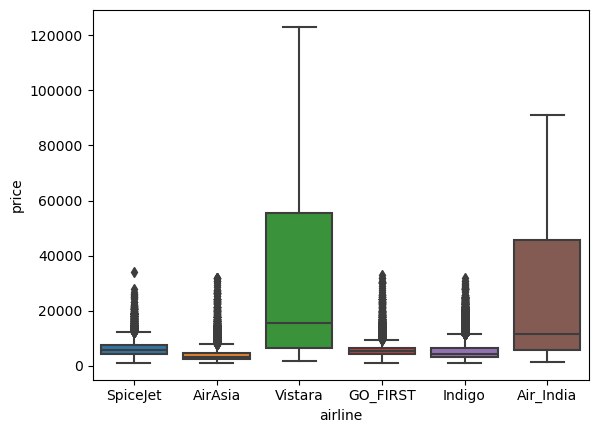

In [106]:
sns.boxplot(x='airline', y='price', data=dataf)

<Axes: xlabel='source_city', ylabel='price'>

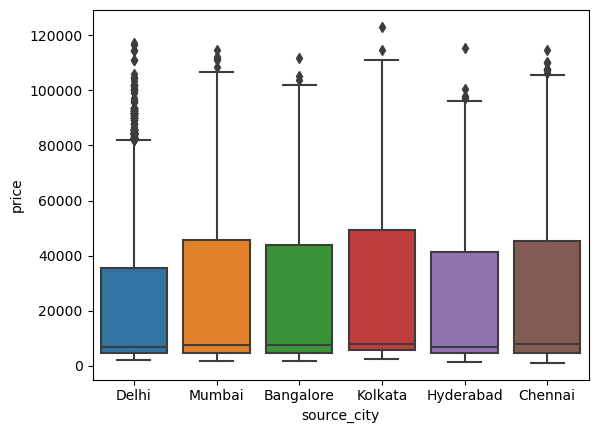

In [107]:
sns.boxplot(x='source_city', y='price', data=dataf)

<Axes: xlabel='departure_time', ylabel='price'>

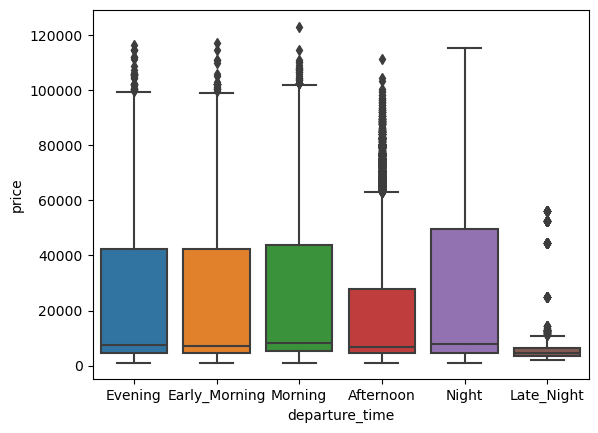

In [108]:
sns.boxplot(x='departure_time', y='price', data=dataf)

<Axes: xlabel='stops', ylabel='price'>

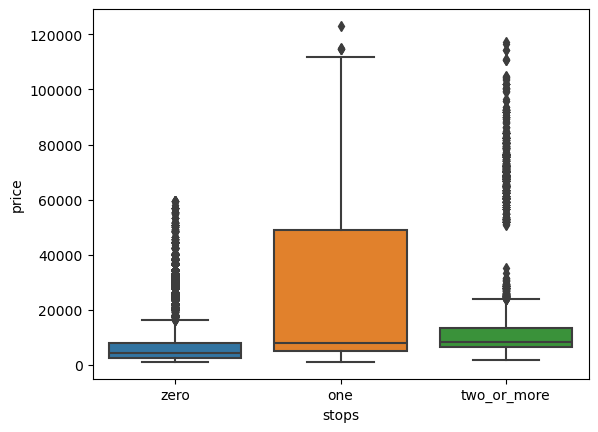

In [109]:
sns.boxplot(x='stops', y='price', data=dataf)

<Axes: xlabel='arrival_time', ylabel='price'>

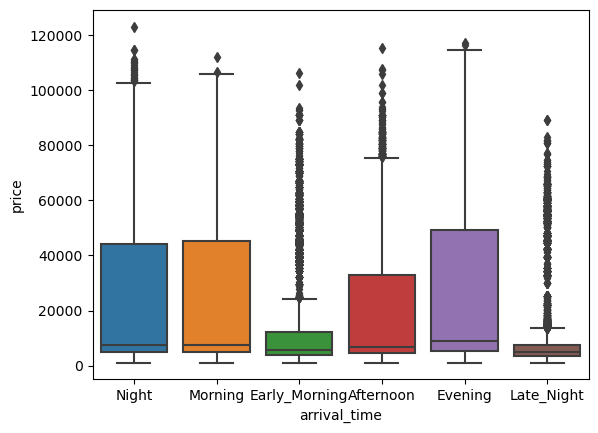

In [110]:
sns.boxplot(x='arrival_time', y='price', data=dataf)

<Axes: xlabel='destination_city', ylabel='price'>

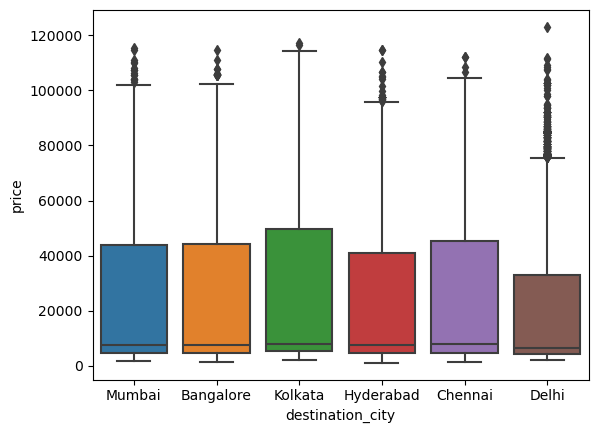

In [111]:
sns.boxplot(x='destination_city', y='price', data=dataf)

<Axes: xlabel='class', ylabel='price'>

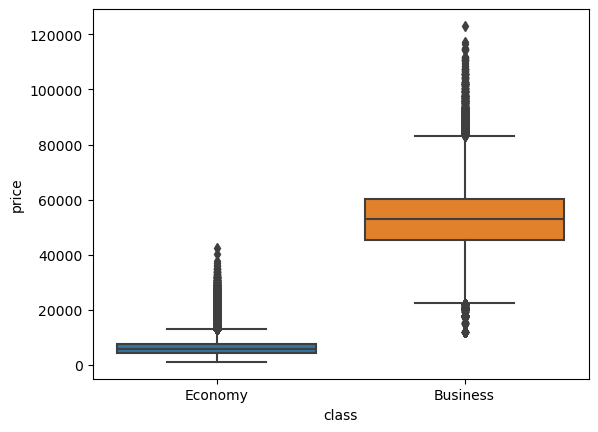

In [112]:
sns.boxplot(x='class', y='price', data=dataf)

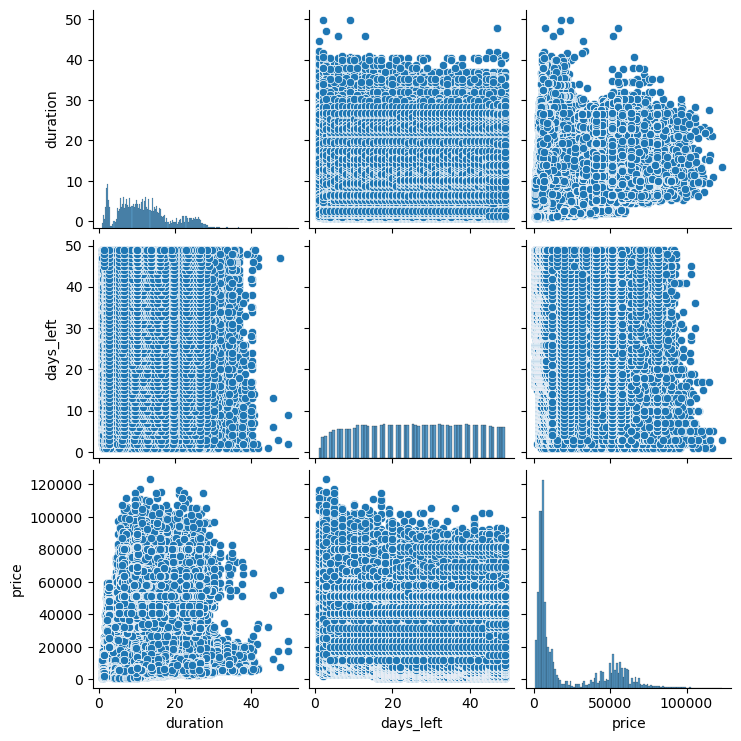

In [113]:
sns.pairplot(dataf)

<Axes: xlabel='price', ylabel='Count'>

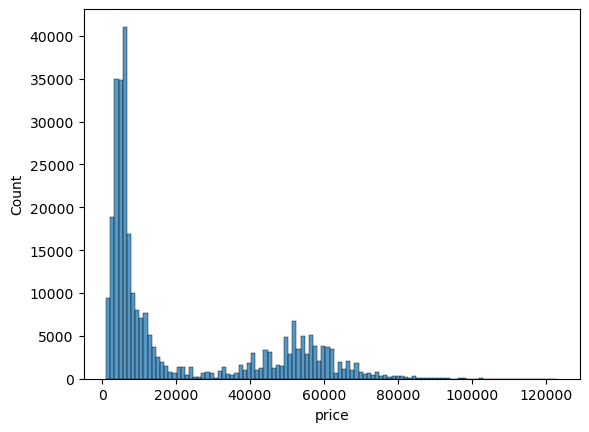

In [114]:
sns.histplot(dataf['price'])

<Axes: >

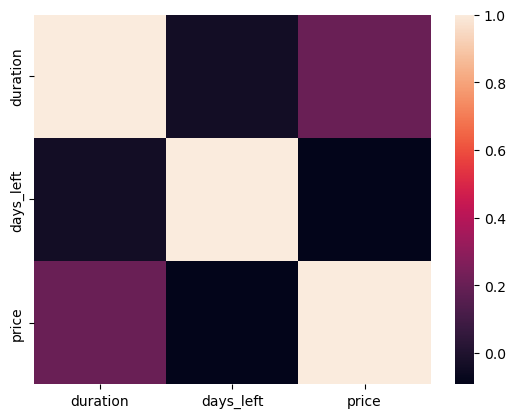

In [115]:
sns.heatmap(dataf.corr(numeric_only=True))

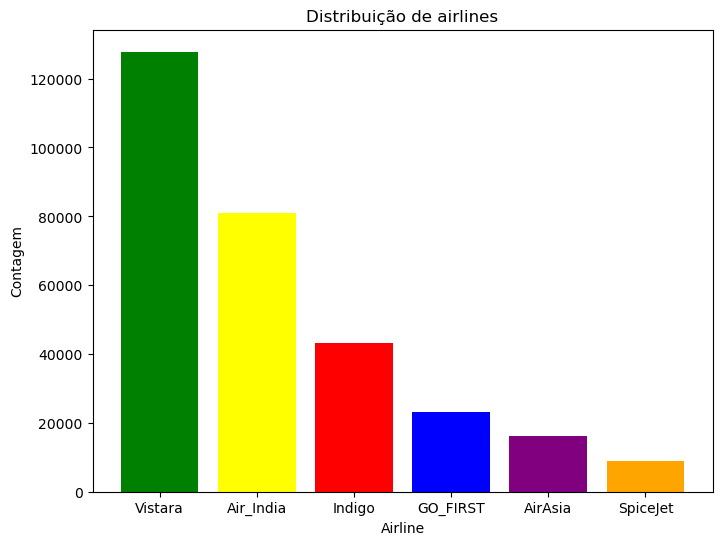

In [116]:
airline = dataf['airline'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(airline.index, airline.values, color=['green', 'yellow', 'red', 'blue', 'purple', 'orange'])
plt.xlabel('Airline')
plt.ylabel('Contagem')
plt.title('Distribuição de airlines')
plt.show()

#### Distribuição dos Atributos

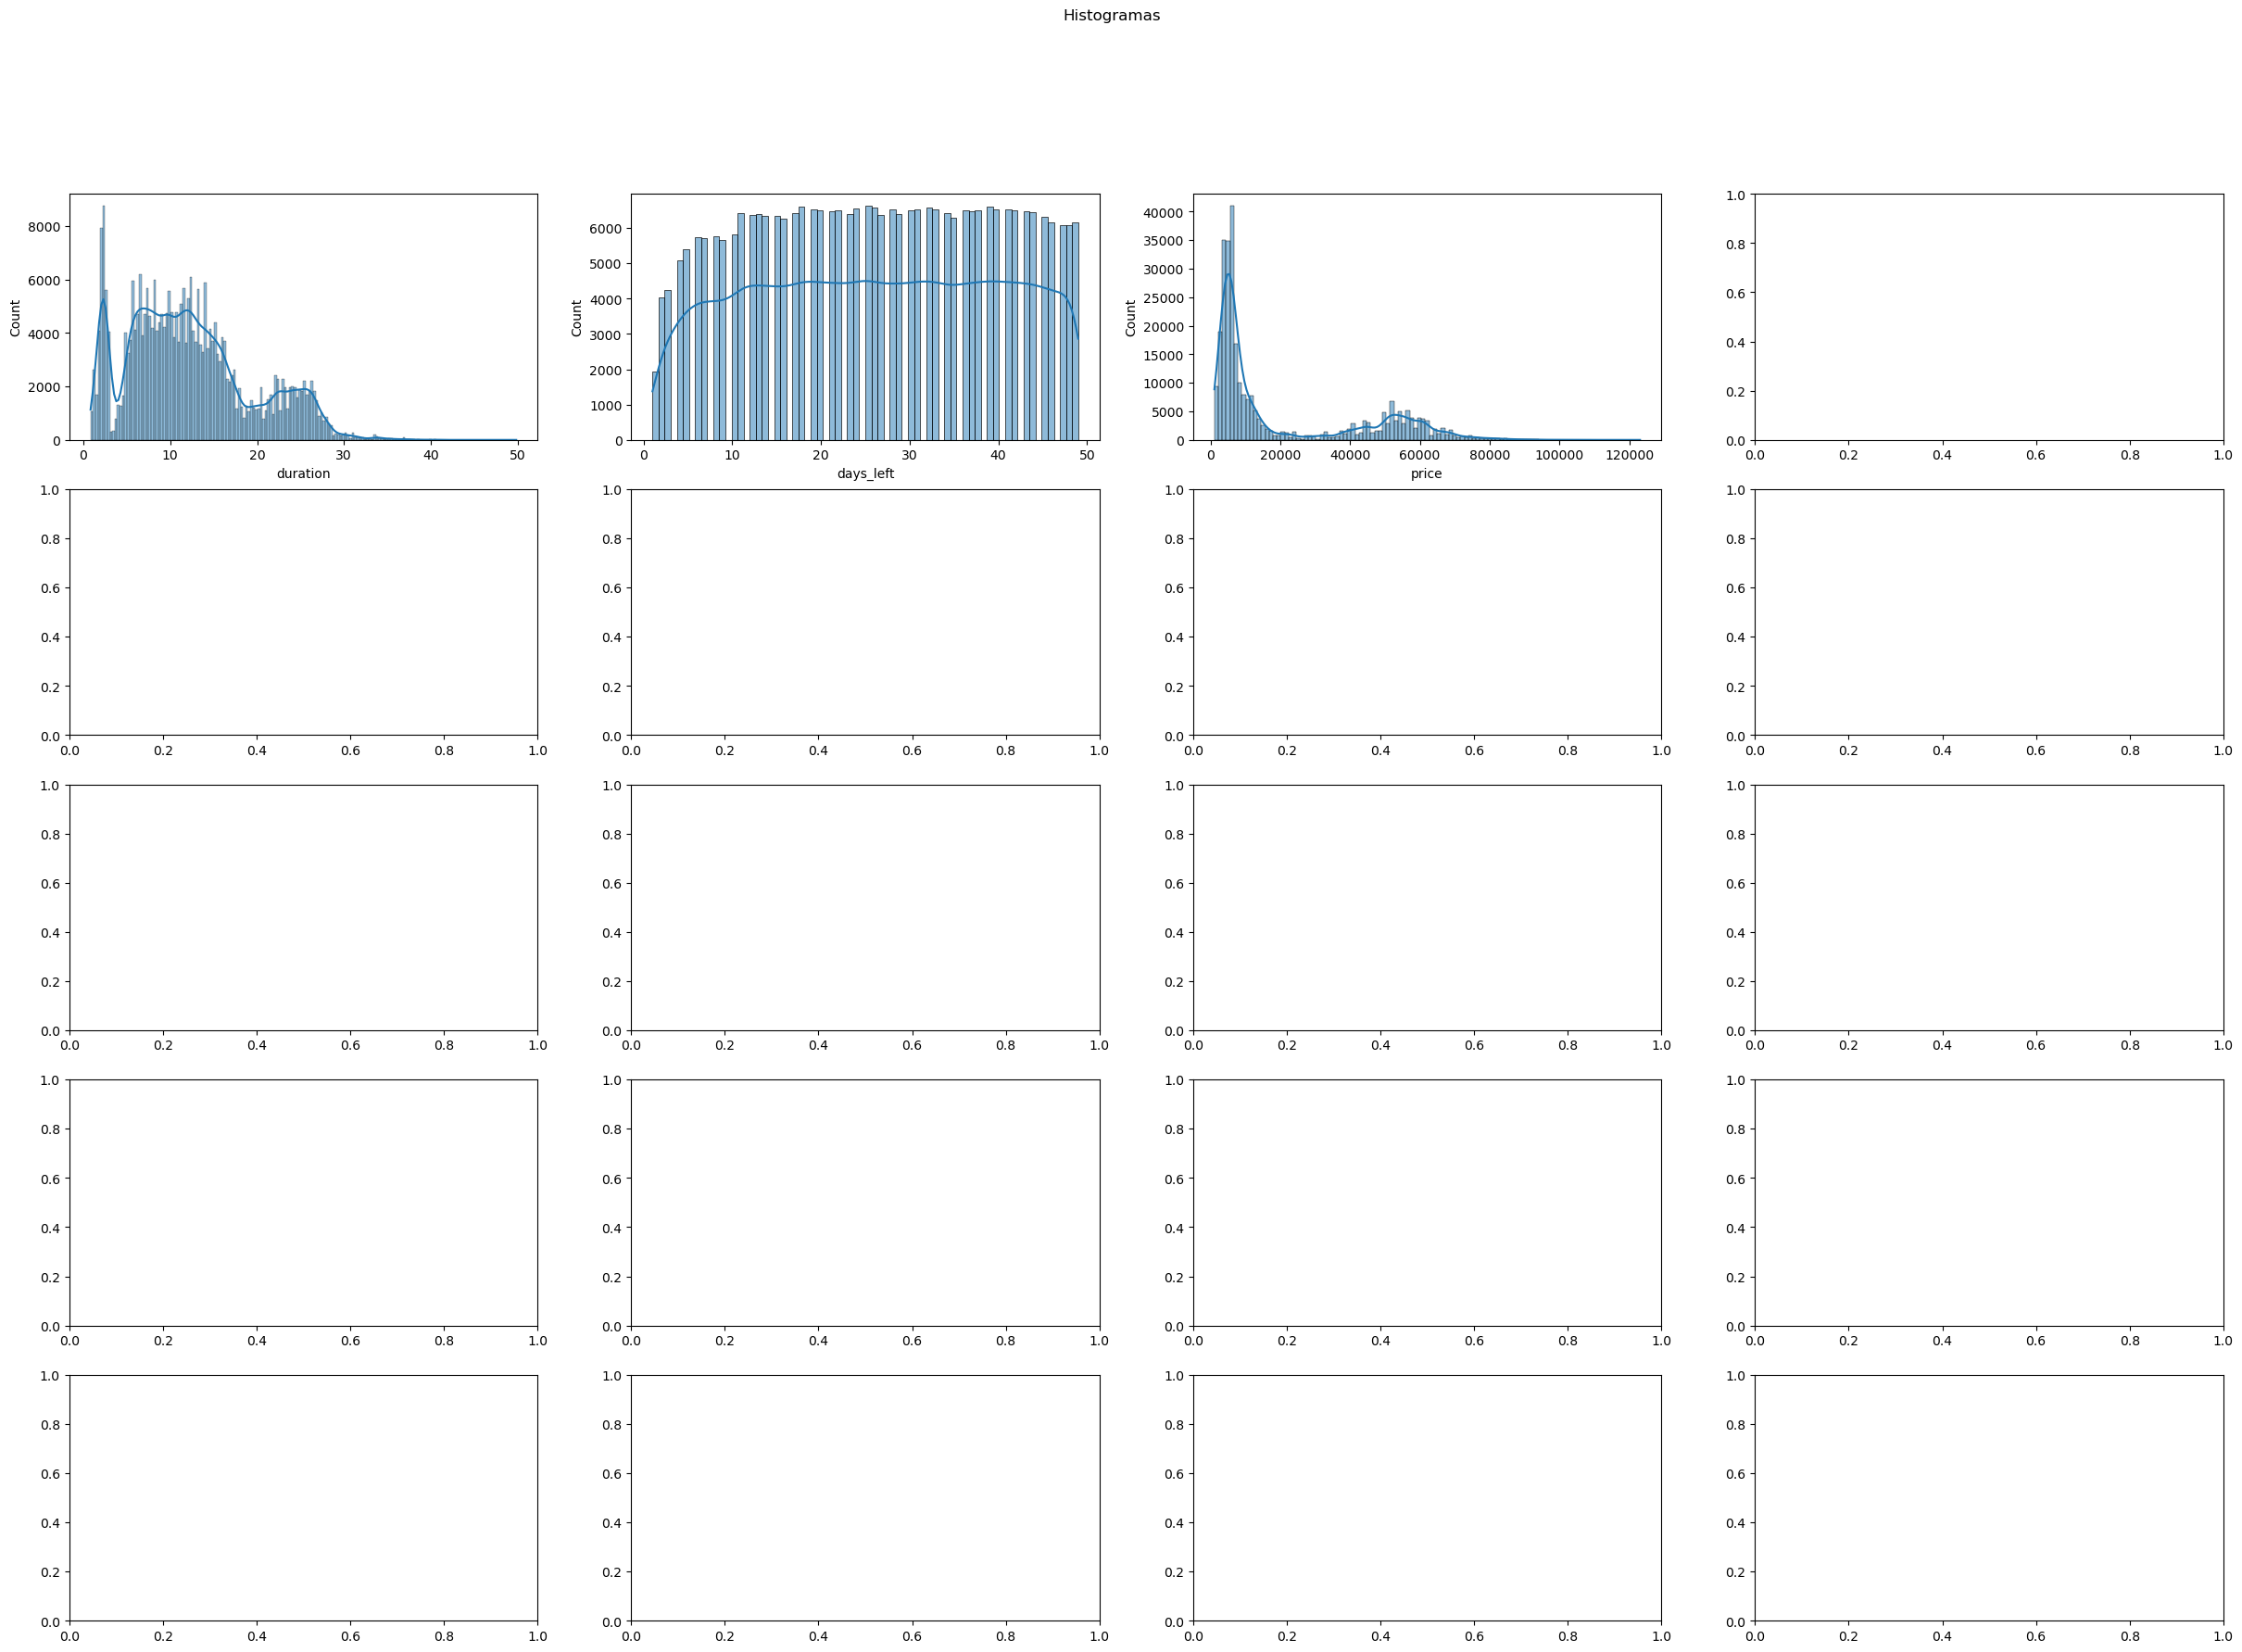

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [117]:
import warnings
warnings.filterwarnings("ignore")

def distribuicao_dos_atributos(dataframe):
    columns_number = 4
    lines_number = 5
    fig, axs = plt.subplots(lines_number,columns_number,figsize=(30,20))
    fig.suptitle('Histogramas')
    columns = list(dataframe.select_dtypes(include=np.number).columns)
    i = 0; j = 0
    for elem in columns:
        plt.figure(figsize = (10,8))
        sns.histplot(x = dataframe[elem], data=dataframe, ax=axs[i,j], kde=True)
        j = j + 1
        if(j == columns_number):
            i=i+1
            j = 0

distribuicao_dos_atributos(dataf)
